In [ ]:
%pip install probscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 kB 11.8 MB/s eta 0:00:00


In [ ]:
%pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=00daf2df89f471d9ffcd4c4ccf22512781acfb723d404e00becbd1ed4638f96b
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import csv
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import probscale

from sklearn.linear_model import LinearRegression
import pingouin as pg

import statsmodels.api as sm
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from statsmodels.graphics.gofplots import qqplot
from sklearn.datasets import fetch_openml
from scipy import stats

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
# https://www.kaggle.com/datasets/prevek18/ames-housing
df = pd.read_excel('/content/AmesHousing.xls')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

# Data Preprocessing

In [ ]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (2930, 82)


In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Exploratory Data Analysis

In [ ]:
# Identify the numeric data columns from the data description document
cols = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
        'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
        'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

df[cols] = df[cols].astype('float')

### Examining Null Values

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [ ]:
df.drop(['Alley', 'Pool QC', 'Misc Feature', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
df.shape

(2930, 77)

In [ ]:
# Notice a large number of null values in 'LotFrontage'. Examine the 'Lots' grouping.
df_lots = df[['Lot Frontage', 'Lot Area', 'Lot Config', 'Lot Shape']]
display(df_lots.groupby(['Lot Shape']).mean(numeric_only=True))
display(df_lots.groupby(['Lot Config']).mean(numeric_only=True))

,Lot Frontage,Lot Area
Lot Shape,,
IR1,74.814985,11544.208376
IR2,67.437500,18913.065789
IR3,117.636364,32064.187500
Reg,66.848871,8865.632598


,Lot Frontage,Lot Area
Lot Config,,
Corner,82.690418,10843.315068
CulDSac,56.304348,15377.383333
FR2,61.276923,10595.976471
FR3,79.300000,10498.857143
Inside,67.147374,9521.918692


In [ ]:
pg.welch_anova(dv="Lot Frontage", between="Lot Shape", data=df_lots)

,Source,ddof1,ddof2,F,p-unc,np2
0,Lot Shape,3,40.990027,19.767845,4.411348e-08,0.042147


In [ ]:
pg.welch_anova(dv="Lot Frontage", between="Lot Config", data=df_lots)

,Source,ddof1,ddof2,F,p-unc,np2
0,Lot Config,4,57.993622,38.973885,8.117688e-16,0.076851


In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df.groupby('Lot Config')['Lot Frontage'].transform('mean'))
df['Lot Frontage'].head()

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

In [ ]:
# One of the chief factors affecting house prices in the size of the property.
# Here we examine the basement square footage variables.
# These 4 variables are correlated. Hence they can be combined

df[['BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF', 'Bsmt Unf SF']].head()

,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,Bsmt Unf SF
0,639.0,0.0,1080.0,441.0
1,468.0,144.0,882.0,270.0
2,923.0,0.0,1329.0,406.0
3,1065.0,0.0,2110.0,1045.0
4,791.0,0.0,928.0,137.0


In [ ]:
# Create a total "finished" basement square footage variable
df['Base Liv Area'] = df["Total Bsmt SF"] - df["Bsmt Unf SF"]
df['Base Liv Area'].head()

0     639.0
1     612.0
2     923.0
3    1065.0
4     791.0
Name: Base Liv Area, dtype: float64

In [ ]:
# We are interested in residential properties only
df['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [ ]:
# Drop non-residential columns
df = df[(df['MS Zoning'] != 'C (all)') & (df['MS Zoning'] != 'I (all)') & (df['MS Zoning'] != 'A (agr)')]

In [ ]:
df['Age'] = df.apply(lambda x: x['Yr Sold']-x['Year Built'] if (x['Year Built']<x['Year Remod/Add']) else (x['Yr Sold']-x['Year Remod/Add']), axis=1)

In [ ]:
# Here we examine the ground square footage variables. The first column is obviously the sum of the other two.
# Hence we'll consider only Gr Liv Area variable
df[['Gr Liv Area', '1st Flr SF', '2nd Flr SF']].head()

,Gr Liv Area,1st Flr SF,2nd Flr SF
0,1656.0,1656.0,0.0
1,896.0,896.0,0.0
2,1329.0,1329.0,0.0
3,2110.0,2110.0,0.0
4,1629.0,928.0,701.0


From hedonic knowledge, it can be inferred that Square footage of the property mostly contributes to its Sale Price. Lets check the correlation between those variables

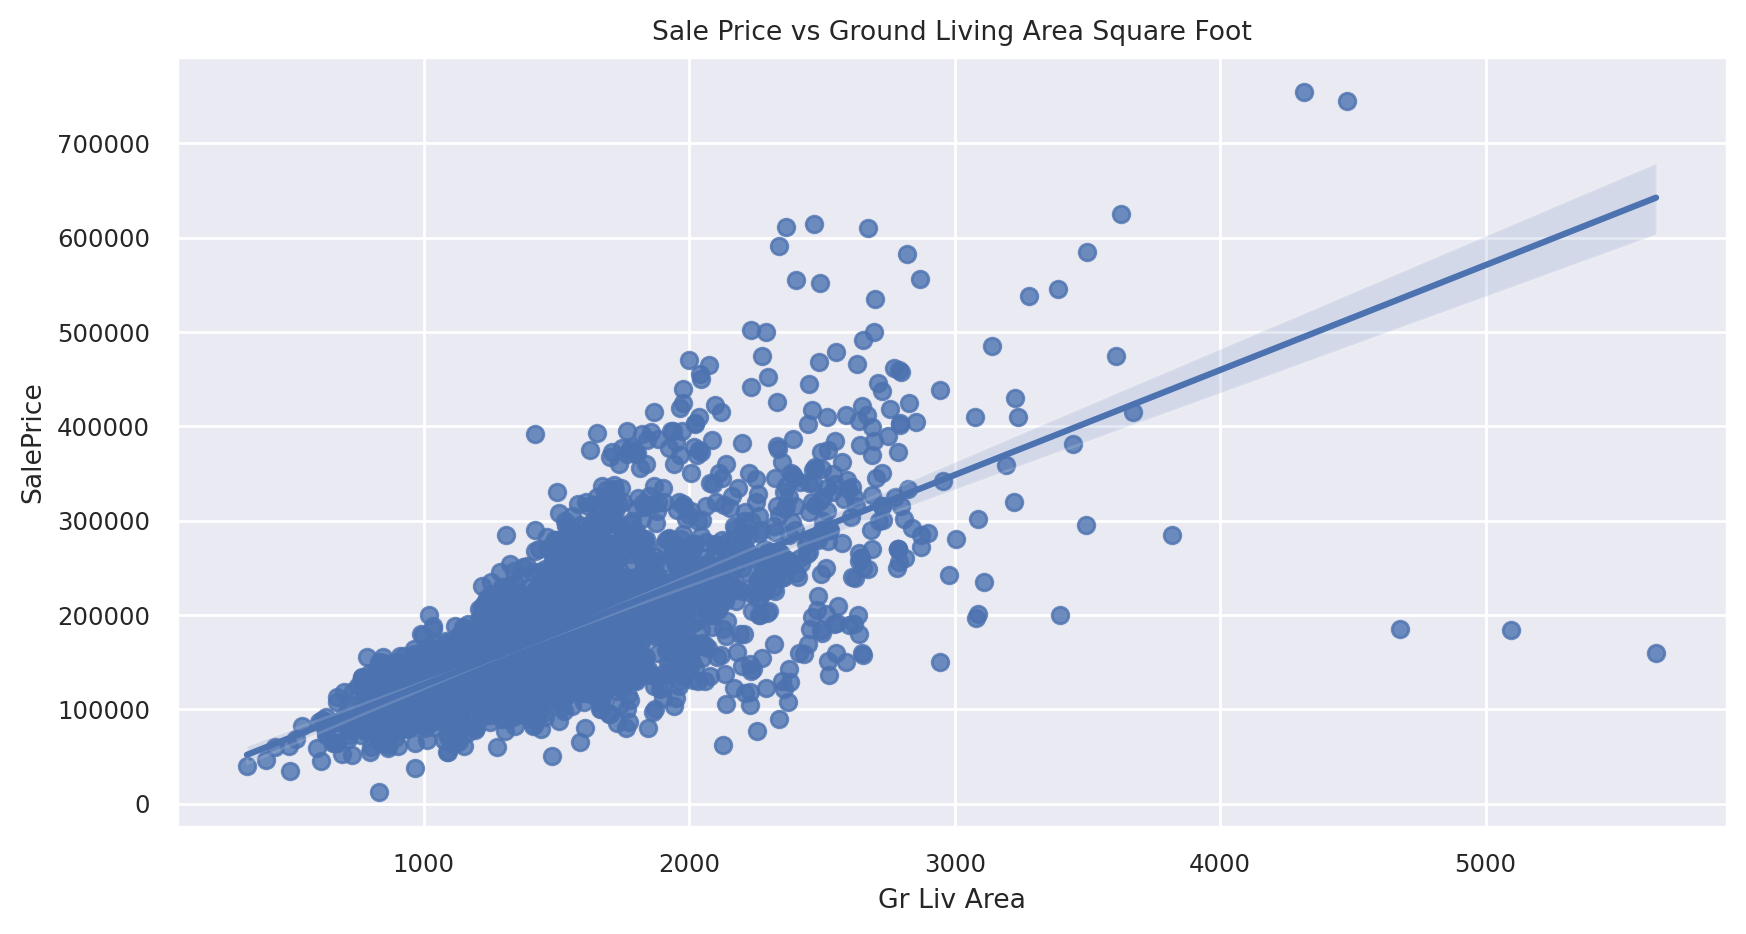

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Gr Liv Area", y="SalePrice", data=df, ax=ax)
ax.set_title('Sale Price vs Ground Living Area Square Foot');

## Pearson's Correlation Coeeficient (R) -
Used to calculate correlation between two continuous variables.

## R^2 (R Squared)
R squared metric between two variables gives an estimate about how much variance of one variable can be explained by the other variable.

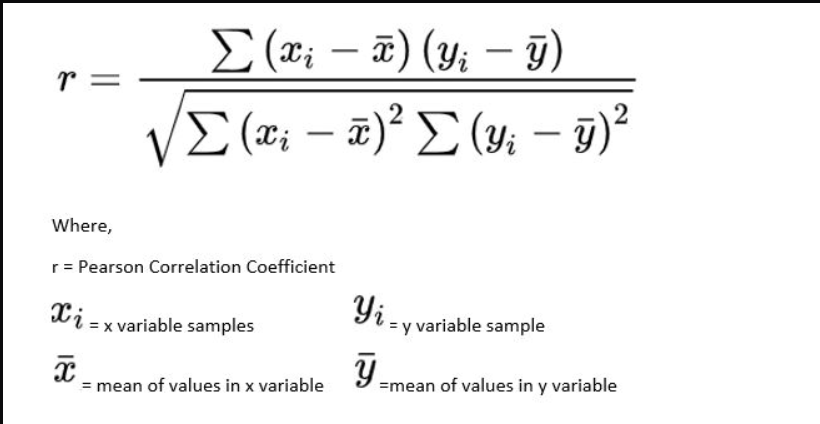

In [ ]:
# A simple linear regression of Gr Liv Area on the SalePrice gives an R-squared of 50% by itself!
ols = LinearRegression()

X_GLA = df[['Gr Liv Area']]
y_SalePrice = df.SalePrice

ols.fit(X_GLA, y_SalePrice)
print("R-squared of Total Square Footage on Sale Price:", ols.score(X_GLA, y_SalePrice))

R-squared of Total Square Footage on Sale Price: 0.4989924240650856


Hence we can see that the Square foot of the property can account for almost 50% of the variance in Sale Price. Hence we should also check the Base Liv Area Sq Ft

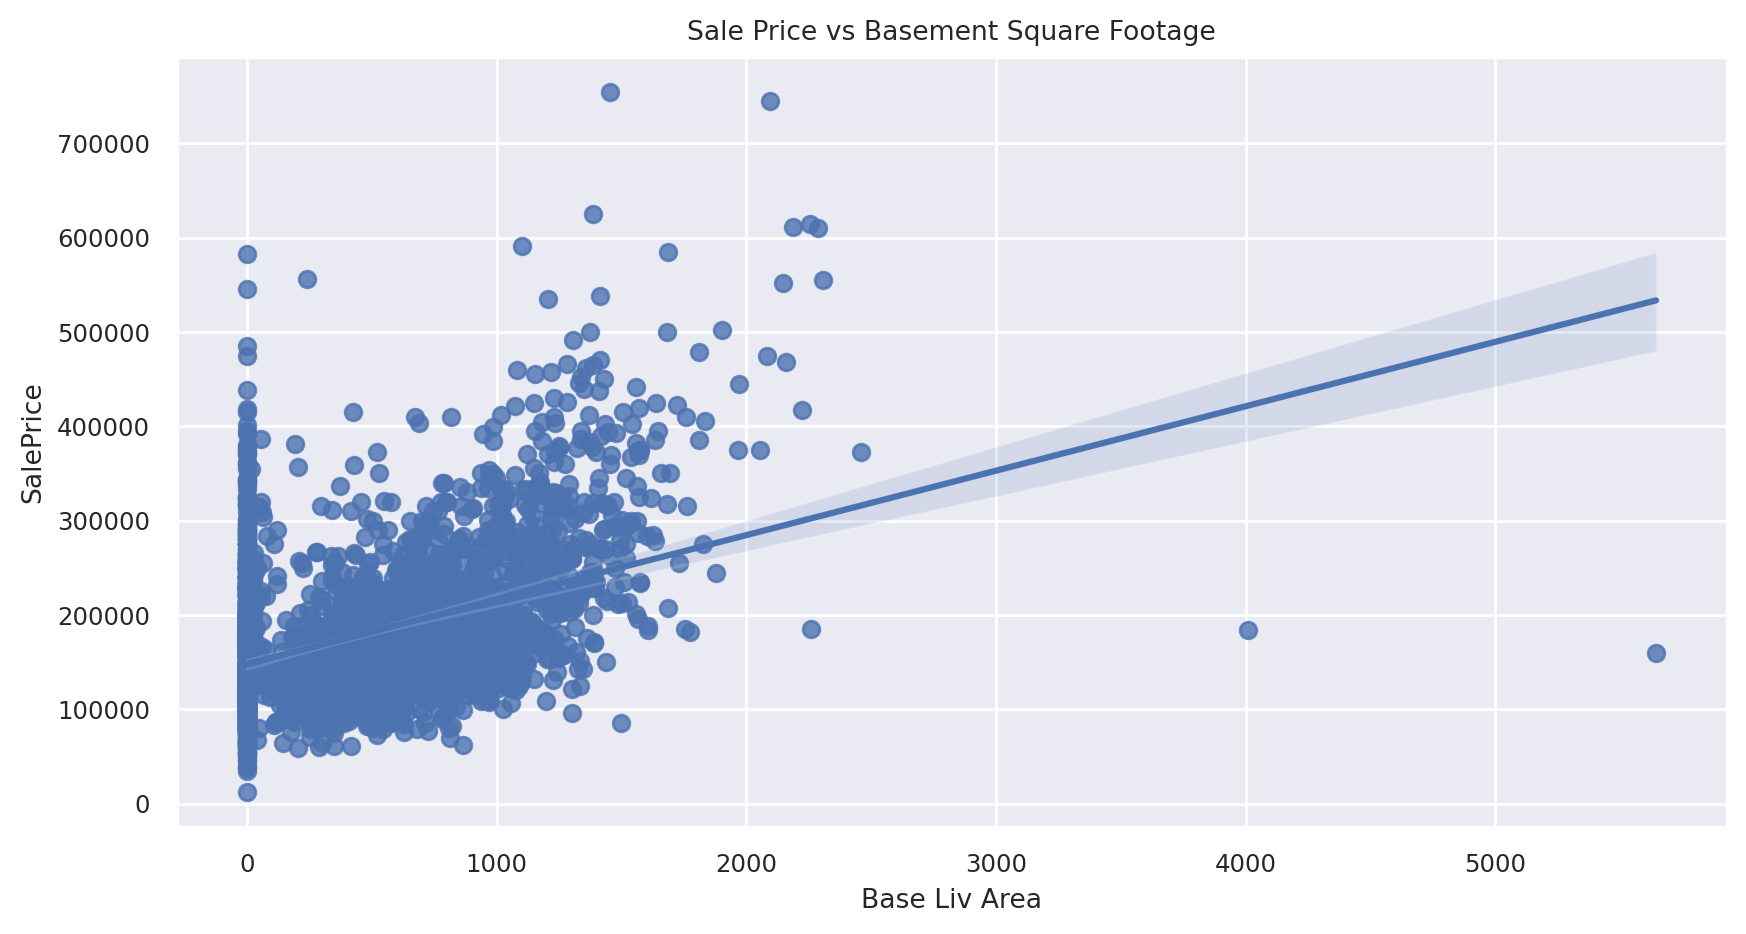

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(y="SalePrice", x="Base Liv Area", data=df, ax=ax)
ax.set_title('Sale Price vs Basement Square Footage');

Collinearity exists between Base Liv Area and Sale Price. But there are outliers too. Hence we should look into eliminating the outliers

## Normal / Gaussian distribution

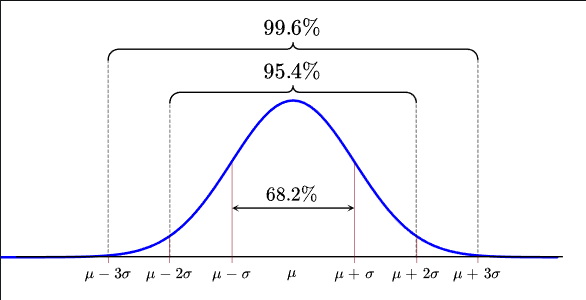

Within 3 standard deviations of the mean, we have almost 99% of the data.

For a standard normal distribution, the mean=0 and sd=1;

Z Score: ` z = (x-μ)/σ`

Hence between 3 and -3 of a standard normal distribution, we'll get 99% of the data

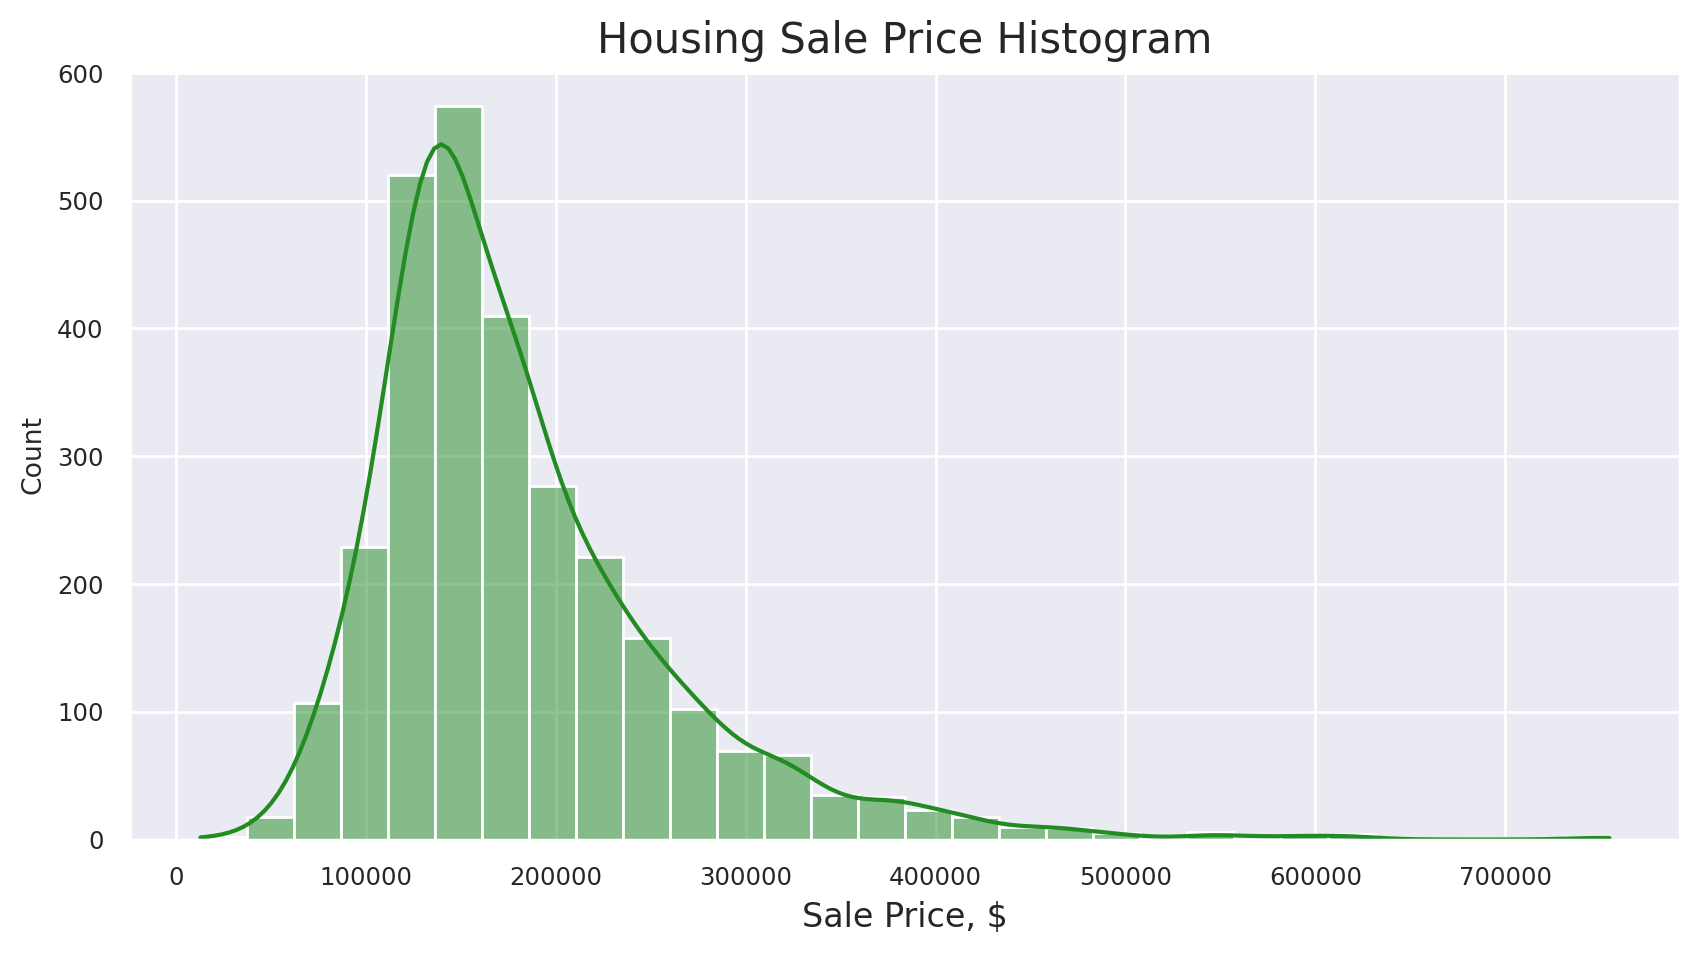

In [ ]:
# The right-skew to the SalePrice in the histogram shows that SalePrice has a long right tail
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(df.SalePrice, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

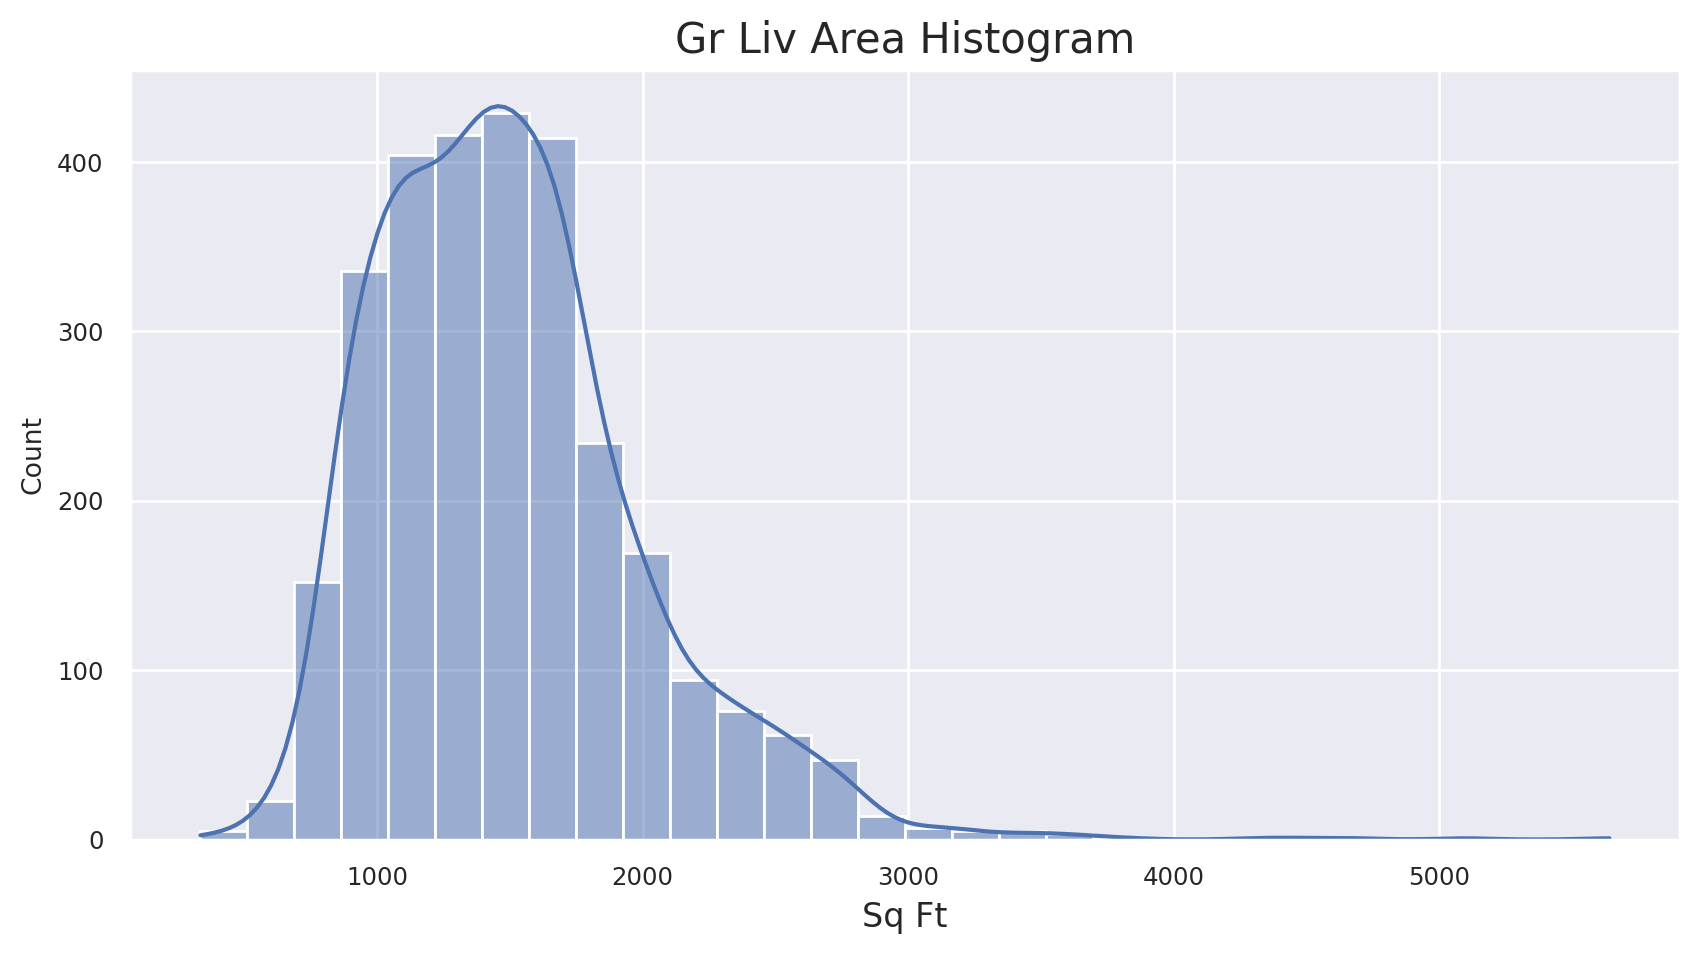

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(df["Gr Liv Area"], bins=30, kde=True, ax=ax)
plt.title('Gr Liv Area Histogram', fontsize=15)
plt.xlabel('Sq Ft', fontsize=12);

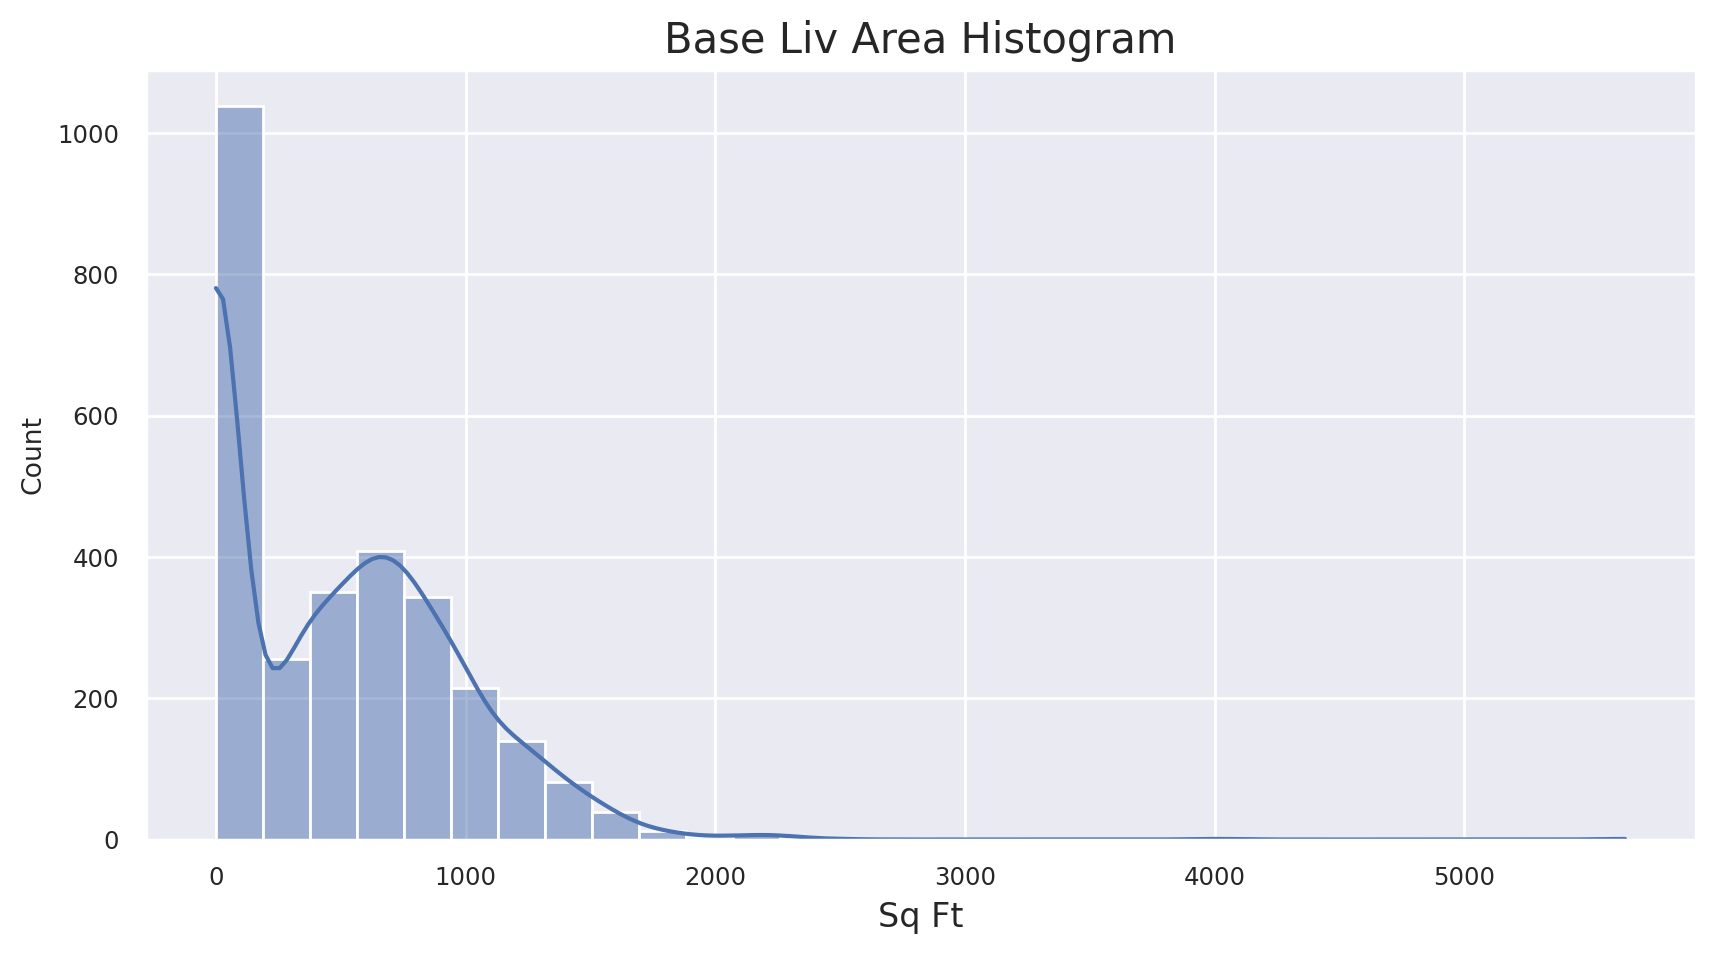

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(df["Base Liv Area"], bins=30, kde=True, ax=ax)
plt.title('Base Liv Area Histogram', fontsize=15)
plt.xlabel('Sq Ft', fontsize=12);

# Removing Outliers

In [ ]:
# Removing outliers from Gr Liv Area and Base Live Area
print(df.shape)
df_t = df[(np.abs(stats.zscore(df["Gr Liv Area"])) < 3)]
print(df_t.shape)
df_t = df_t[(np.abs(stats.zscore(df_t["SalePrice"])) < 3)]
print(df_t.shape)
df_t = df_t[(df_t["Base Liv Area"] < np.mean(df_t["Base Liv Area"]) + 3*np.std(df_t["Base Liv Area"]))]
print(df_t.shape)

(2901, 79)
(2876, 79)
(2831, 79)
(2823, 79)


In [ ]:
# Computing Price per Square Foot
df_t['PriceSF'] = df_t["SalePrice"] / df_t["Gr Liv Area"]
df_t["PriceSF"].head()

0    129.830918
1    117.187500
2    129.420617
3    115.639810
4    116.574586
Name: PriceSF, dtype: float64

In [ ]:
# Excluding Non - Commercial Transactions
df_t["Sale Condition"].value_counts()

Normal     2356
Partial     217
Abnorml     173
Family       44
Alloca       21
AdjLand      12
Name: Sale Condition, dtype: int64

In [ ]:
df_t = df_t[(df_t["Sale Condition"] != 'Abnorml')]
df_t = df_t[(df_t["Sale Condition"] != 'Family')]
print(df_t.shape)

(2606, 80)


### Applying Data Transformation

Log Transform

>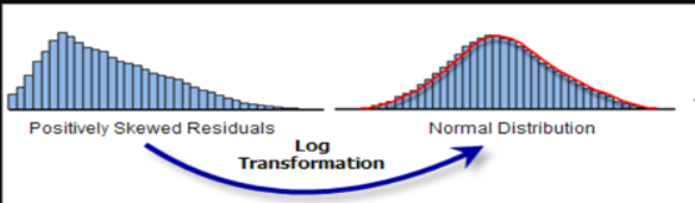

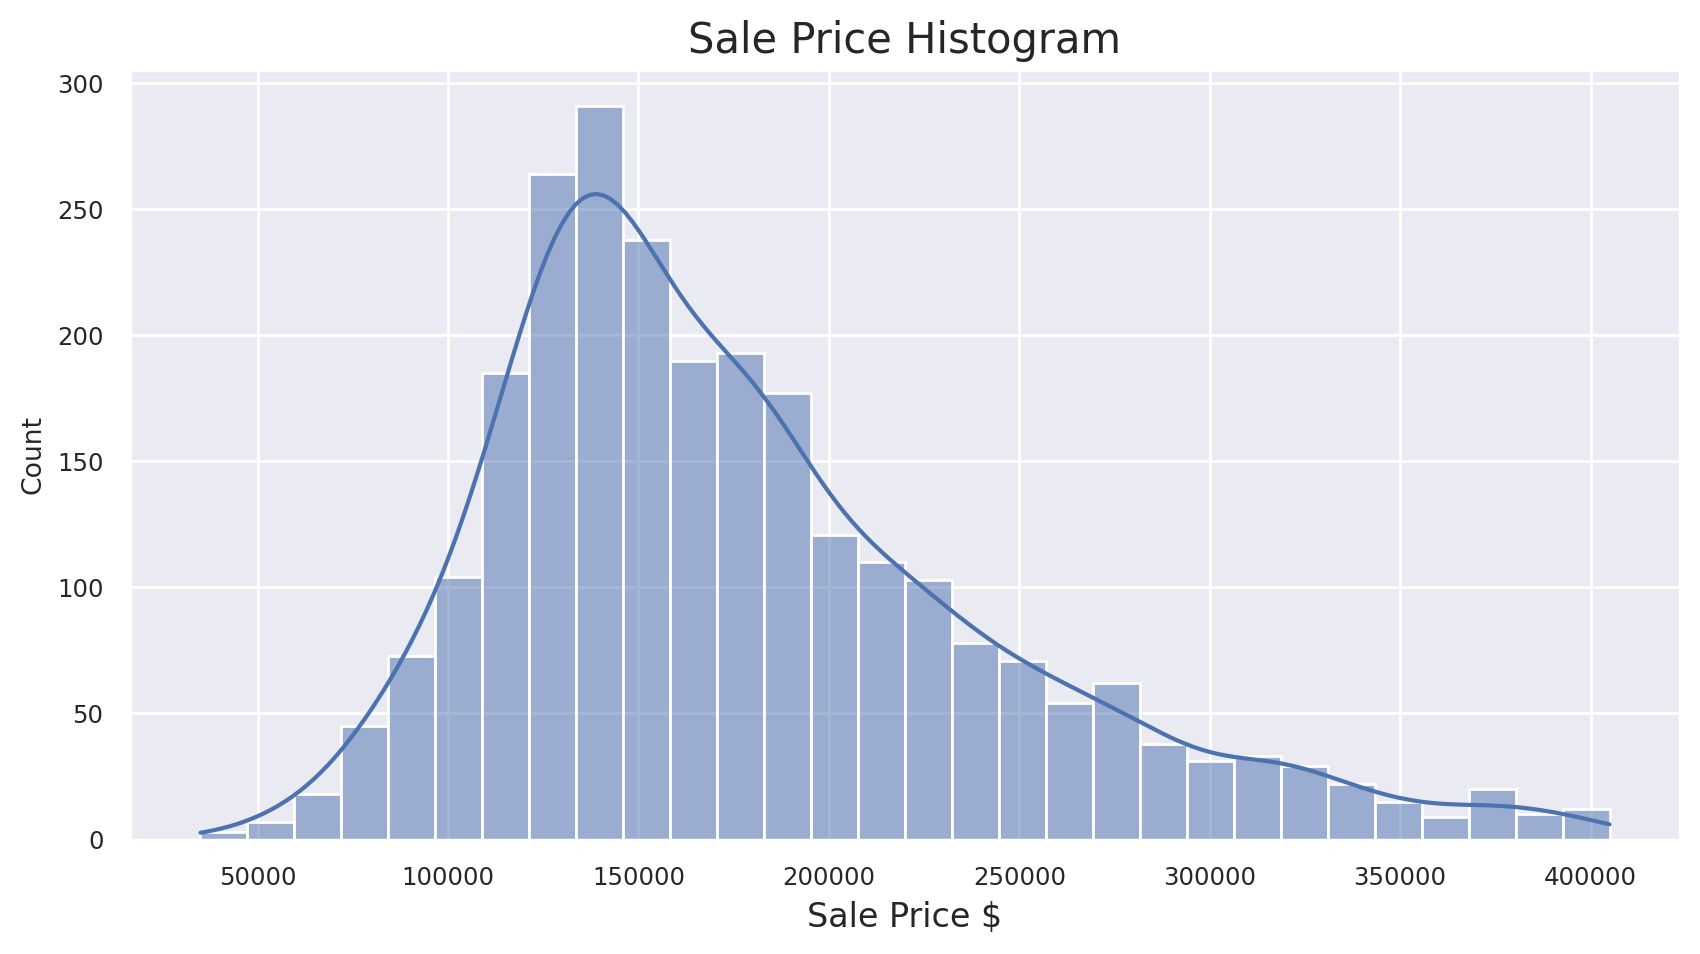

In [ ]:
# Despite all the measures above, 'SalePrice' still very much skewed to the right
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df_t.SalePrice, bins=30, kde=True, ax=ax)
plt.title('Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price $', fontsize=12);

## QQ-Plot

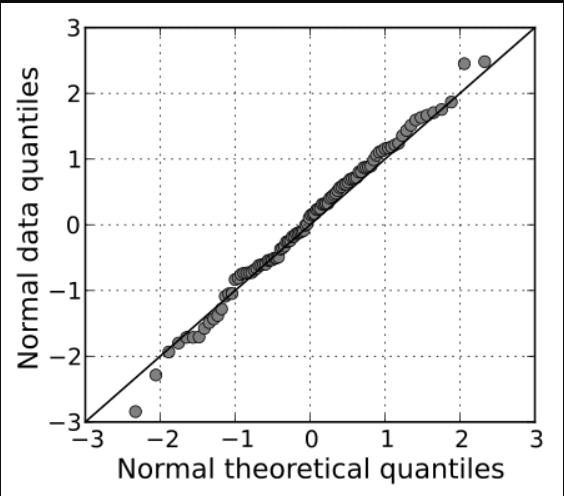

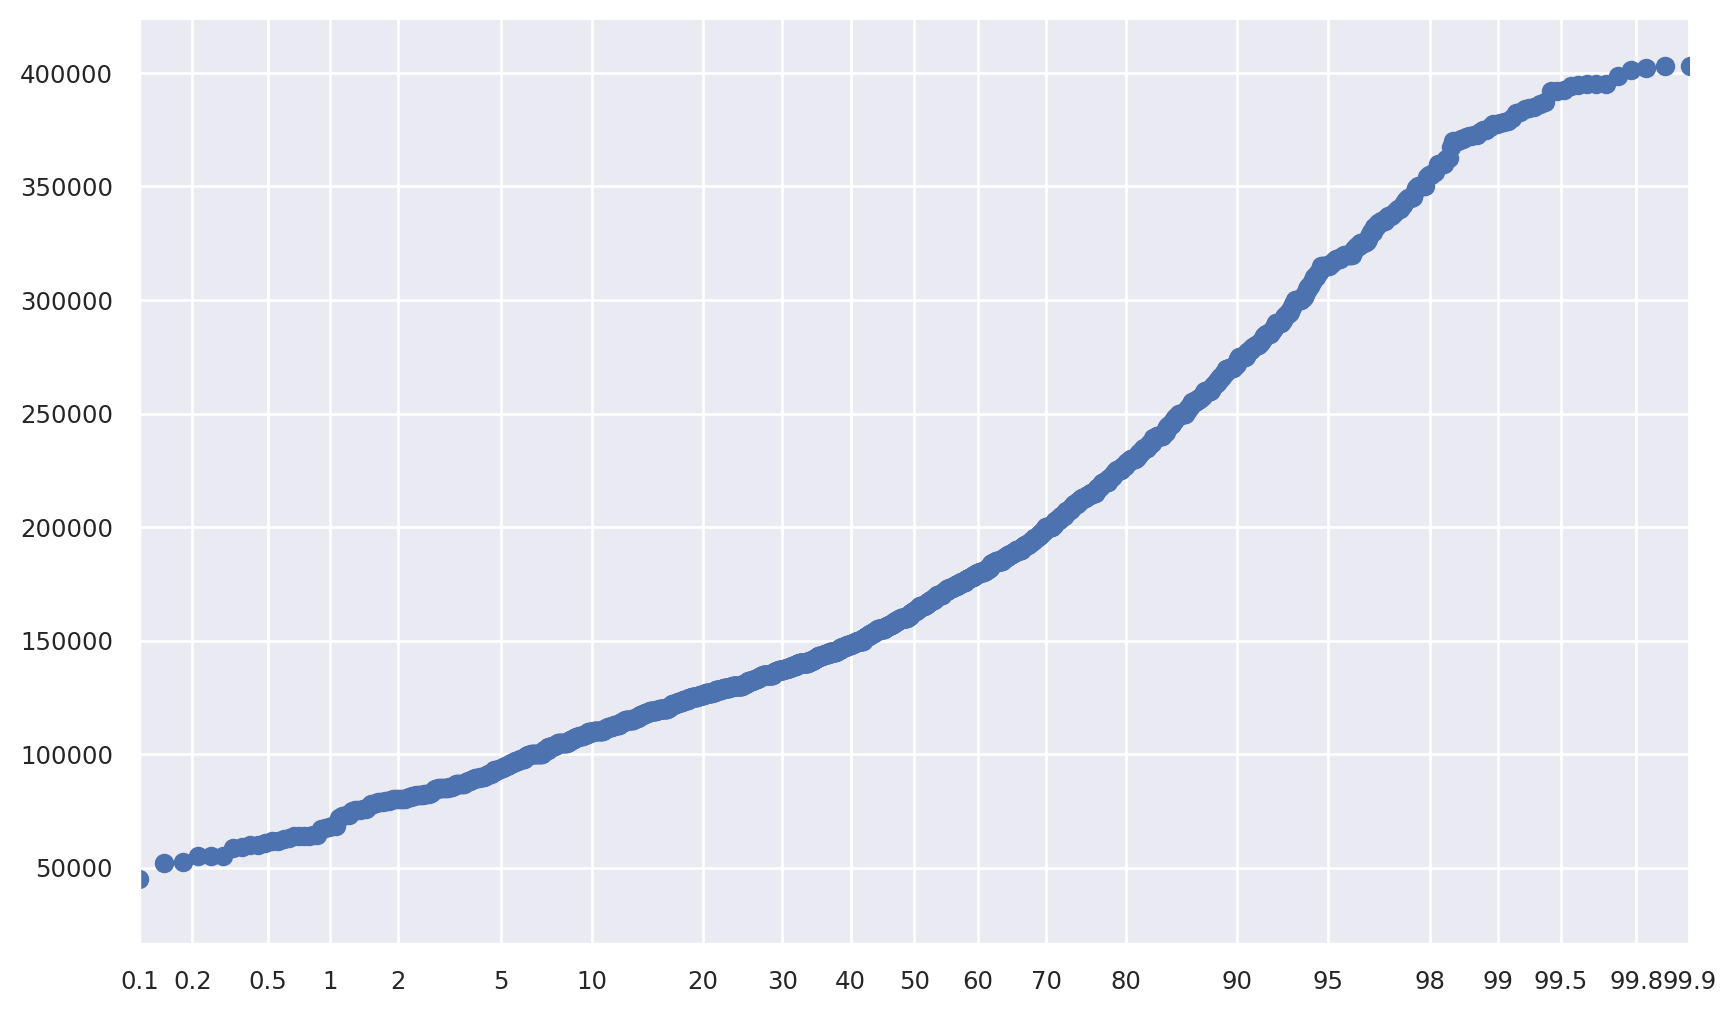

In [ ]:
# The qq-plot doesn't represent a Normal Distribution
fig, ax = plt.subplots(figsize=(10,6))
fig = probscale.probplot(df_t.SalePrice, ax=ax, plottype='prob')

ax.set_xlim(0.1, 99.9)
ax.set_xscale('prob')
sns.despine(fig=fig)

In [ ]:
# Transform both sale price variables by taking the natural log to reduce the right-skew of the distributions
# The log transformation is also appropriate given that both variables have only non-zero positive values
df_t['LnSalePrice'] = np.log(df_t.SalePrice)
df_t['LnPriceSF'] = np.log(df_t.PriceSF)

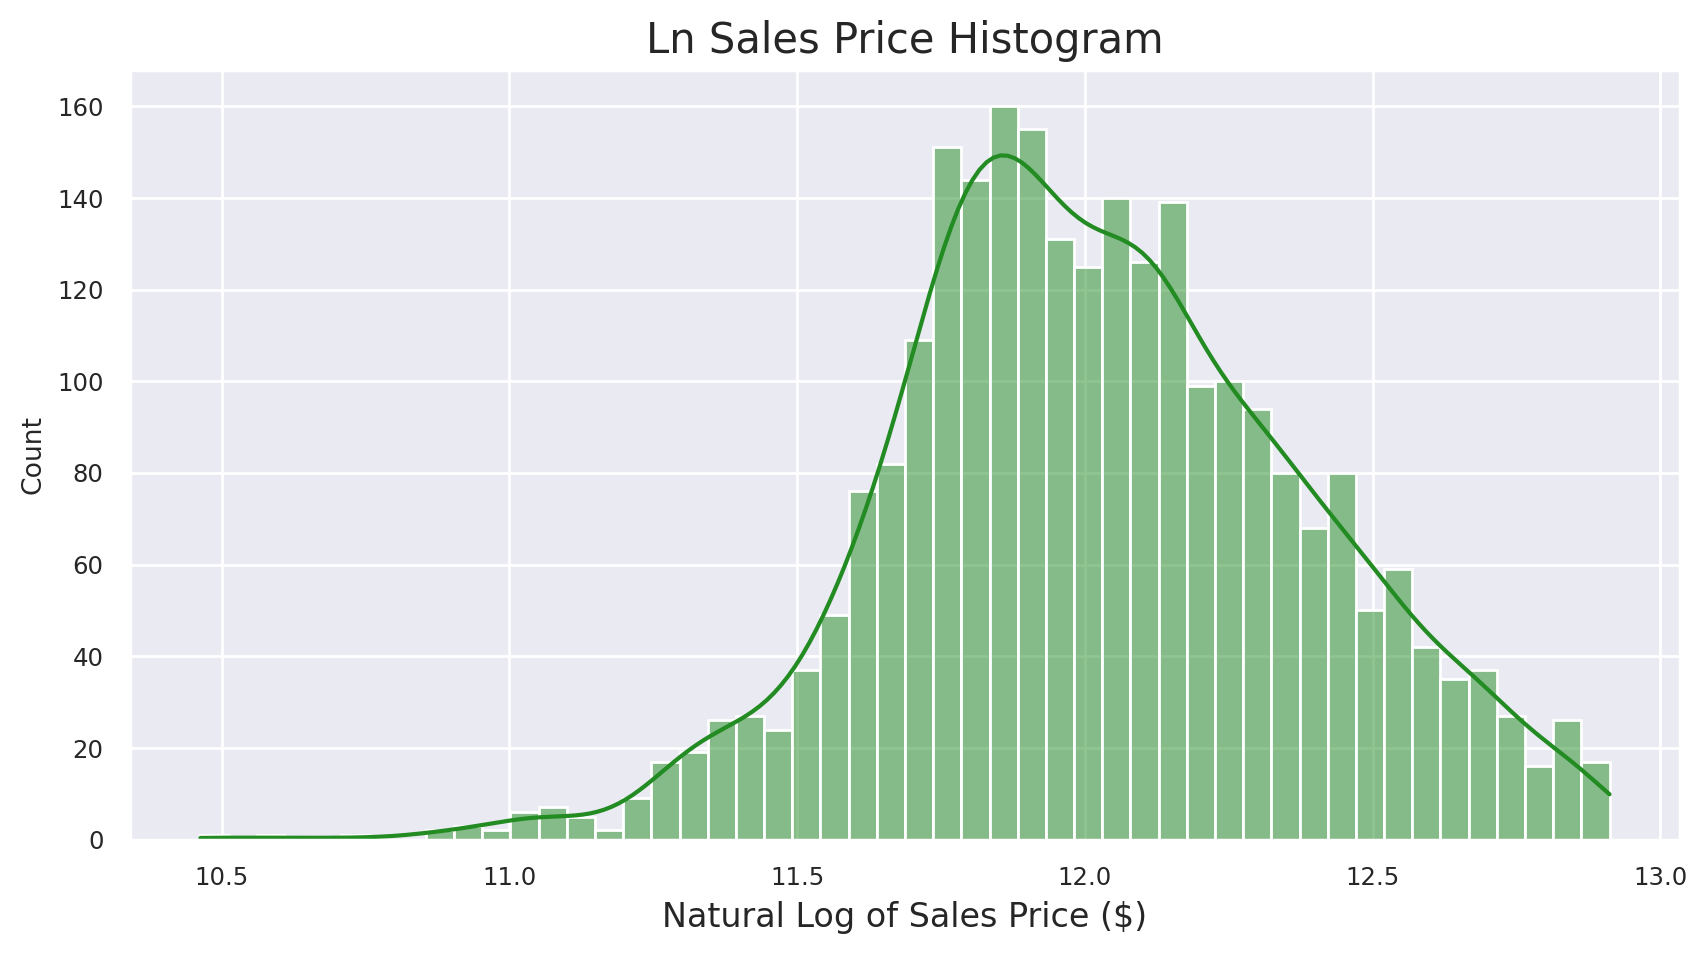

In [ ]:
# The histogram of the ln SalePrice is clearly more symmetric
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df_t.LnSalePrice, bins=50, kde=True, ax=ax, color='forestgreen')
plt.title('Ln Sales Price Histogram', fontsize=15)
plt.xlabel('Natural Log of Sales Price ($)', fontsize=12);

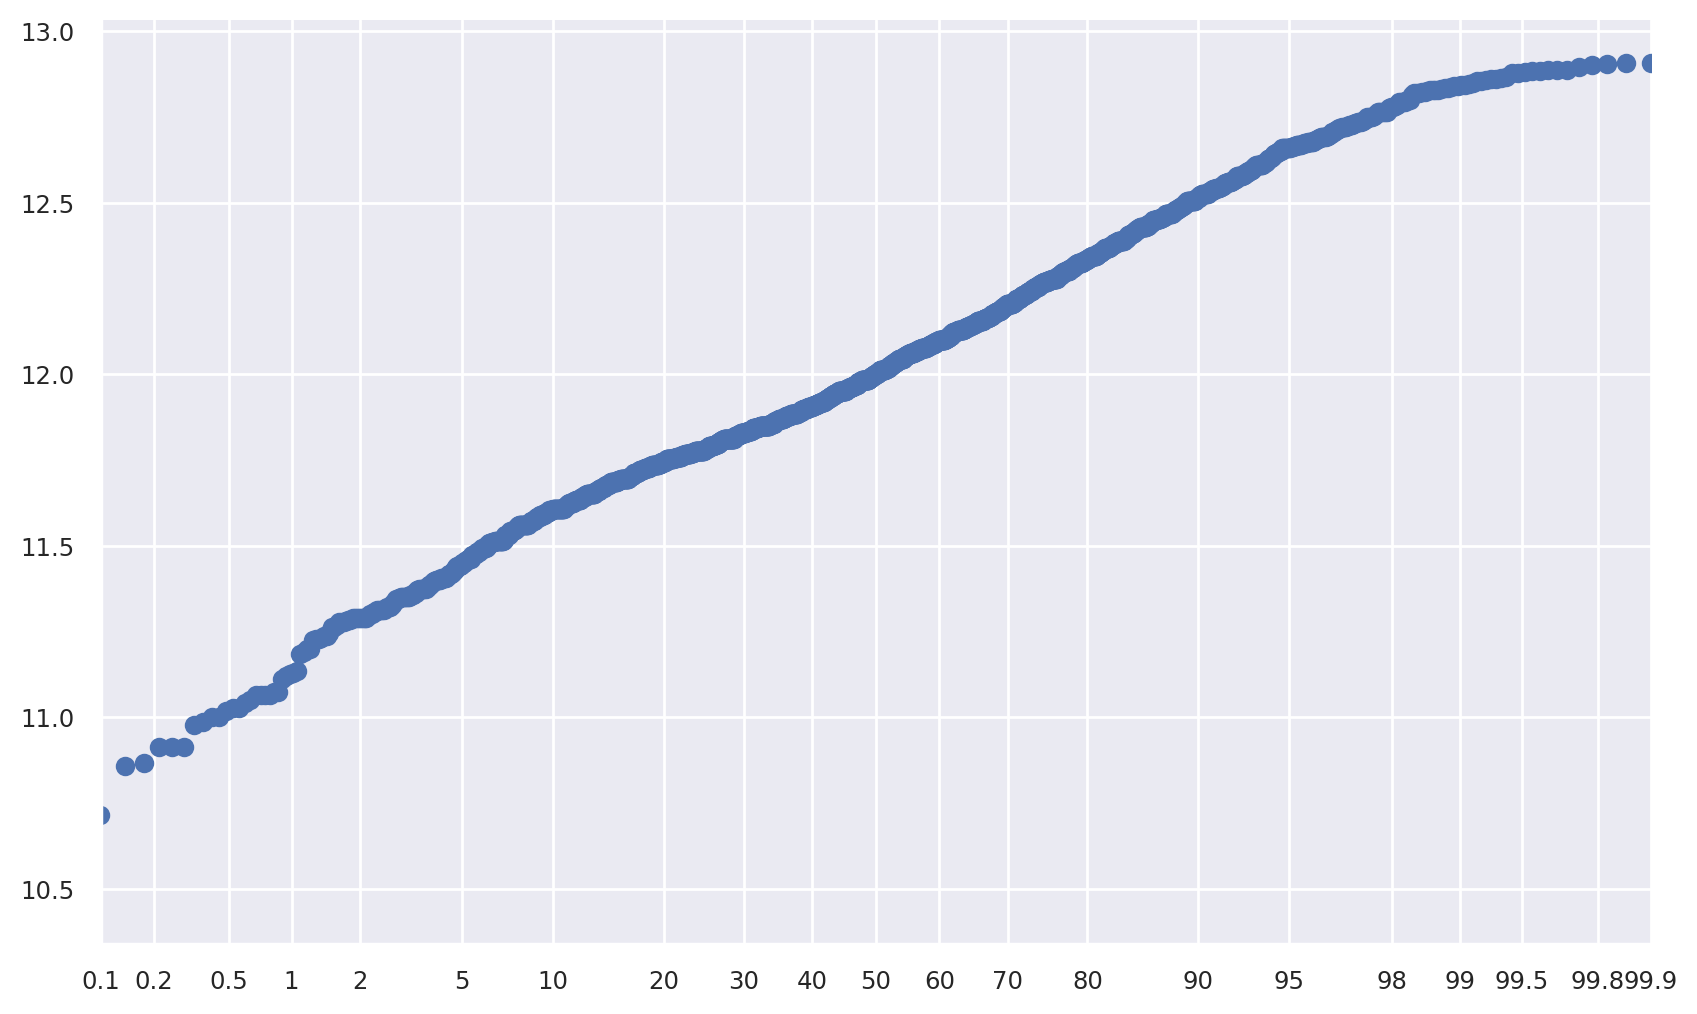

In [ ]:
# GG-Plot of Natural log of 'SalePrice' is closer to a normal distribution
fig, ax = plt.subplots(figsize=(10,6))
fig = probscale.probplot(df_t.LnSalePrice, ax=ax, plottype='prob')

ax.set_xlim(0.1, 99.9)
ax.set_xscale('prob')
sns.despine(fig=fig)

Combining features to simulate location

In [ ]:
# The price per sq ft varies across different neighborhoods thus signifying
# the premium that is associated with a neighborhood
neigh_mean = df_t['PriceSF'].groupby(df_t['Neighborhood']).mean().sort_values()
neigh_mean

Neighborhood
SWISU       90.172735
OldTown     93.389951
MeadowV     94.290459
IDOTRR      97.026195
BrDale      97.354959
Landmrk    103.787879
BrkSide    104.304506
Edwards    104.613653
NWAmes     115.920637
NPkVill    116.148633
NAmes      117.551865
SawyerW    117.602811
Gilbert    119.041152
Sawyer     121.367125
Crawfor    122.582153
Blueste    126.218703
ClearCr    128.136260
NoRidge    129.935545
Mitchel    131.825229
CollgCr    137.118071
Blmngtn    140.088760
Somerst    143.297114
Timber     144.910296
Veenker    148.391825
StoneBr    158.411843
NridgHt    159.981008
Greens     168.835142
GrnHill    198.656617
Name: PriceSF, dtype: float64

In [ ]:
print(f"Unique locations: {df_t['Neighborhood'].nunique()}")
df_t["Neighborhood"].value_counts()

Unique locations: 28


NAmes      395
CollgCr    257
OldTown    206
Somerst    171
Edwards    168
Gilbert    158
Sawyer     137
NridgHt    136
SawyerW    118
NWAmes     117
Mitchel    103
BrkSide     98
Crawfor     94
Timber      65
NoRidge     60
IDOTRR      57
SWISU       40
ClearCr     38
StoneBr     38
MeadowV     34
Blmngtn     28
BrDale      26
NPkVill     22
Veenker     19
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [ ]:
# Creating a new numeric ordinal variable for 'Functional'
# We expect good neighborhoods to have houses with Typical Functionality
def functional_numeric(x):
  if 'Typ' in x:
    return 8
  elif 'Min1' in x:
    return 7
  elif 'Min2' in x:
    return 6
  elif 'Mod' in x:
    return 5
  elif 'Maj1' in x:
    return 4
  elif 'Maj2' in x:
    return 3
  elif 'Sev' in x:
    return 2
  else:
    return 1

df_t['Functional_Num'] = df_t.Functional.map(functional_numeric)

In [ ]:
# Creating a new numeric ordinal variable for external conditon or 'ExterCond'
# Good neighborhoods are expected to have well maintained houses
def extercond_numeric(x):
  if 'Ex' in x:
    return 5
  elif 'Gd' in x:
    return 4
  elif 'TA' in x:
    return 3
  elif 'Fa' in x:
    return 2
  else:
    return 1

df_t['ExterCond_Num'] = df_t["Exter Cond"].map(extercond_numeric)

In [ ]:
# Creating a new numeric ordinal variable for external quality or 'ExterQual'
# Good neighborhoods are expected to have houses with Good external qualities
def exterqual_numeric(x):
  if 'Ex' in x:
    return 5
  elif 'Gd' in x:
    return 4
  elif 'TA' in x:
    return 3
  elif 'Fa' in x:
    return 2
  else:
    return 1

df_t['ExterQual_Num'] = df_t["Exter Qual"].map(exterqual_numeric)

In [ ]:
# Simulating the Location using the above variables
df_t['Location'] = ((df_t['Overall Qual']/df_t['Overall Qual'].mean())
                        + (df_t['Overall Cond']/df_t['Overall Cond'].mean())
                        + (df_t['ExterQual_Num']/df_t['ExterQual_Num'].mean())
                        + (df_t['ExterCond_Num']/df_t['ExterCond_Num'].mean())
                        + (df_t['Functional_Num']/df_t['Functional_Num'].mean()))

In [ ]:
# The average 'Location' scores of the respective neighbourhoods
df_t['Location'].groupby([df_t.Neighborhood]).mean().sort_values()

Neighborhood
MeadowV    4.618470
Edwards    4.690290
Sawyer     4.745369
Landmrk    4.750510
SWISU      4.756987
BrDale     4.780980
IDOTRR     4.789768
NAmes      4.825114
BrkSide    4.839068
Mitchel    4.849249
NPkVill    4.914243
OldTown    4.950256
ClearCr    4.957159
Gilbert    5.016649
SawyerW    5.023836
NWAmes     5.041348
Crawfor    5.134981
CollgCr    5.141823
Blueste    5.147951
GrnHill    5.208954
Timber     5.226162
Blmngtn    5.232403
Somerst    5.264699
NoRidge    5.383750
StoneBr    5.408588
Greens     5.417773
Veenker    5.449765
NridgHt    5.466550
Name: Location, dtype: float64

Categorizing Location

In [ ]:
def add_location(x):
  if 'MeadowV' in x or 'Edwards' in x or 'Sawyer' in x or 'Landmrk' in x or 'SWISU' in x or 'BrDale' in x or 'IDOTRR' in x:
    return 1
  elif 'NAmes' in x or 'Mitchel' in x or 'BrkSide' in x or 'NPkVill' in x or 'OldTown' in x or 'ClearCr' in x or 'Gilbert' in x:
    return 2
  elif 'SawyerW' in x or 'NWAmes' in x or 'Crawfor' in x or 'CollgCr' in x or 'Blueste' in x or 'GrnHill' in x or 'Blmngtn' in x:
    return 3
  else:
    return 4

df_t['Location'] = df_t.Neighborhood.map(add_location)

In [ ]:
df_t['Location'].value_counts()

2    1020
1     581
3     508
4     497
Name: Location, dtype: int64

Other feature Engineering

In [ ]:
# Previous hedonic analysis have shown that places which have a low population
# density have higher value.
def add_zoning(x):
  if 'RM' in x:
    return 1
  elif 'RH' in x:
    return 2
  elif 'RL' in x:
    return 3
  else:
    return 4

df_t['Zoning'] = df_t["MS Zoning"].map(add_zoning)

In [ ]:
# Previous studies have shown a negative relationship between housing prices and being adjacent
# or near to a major roadway or a railway line.
# Creating variables to capture this negative enviromental impact
def add_roadrail(x):
  if 'Artery' in x:
    return 1
  elif 'RRAn' in x:
    return 1
  elif 'RRNn' in x:
    return 1
  elif 'RRAe' in x:
    return 1
  elif 'RRNe' in x:
    return 1
  else:
    return 0

df_t['RoadRail1'] = df_t["Condition 1"].map(add_roadrail)
df_t['RoadRail2'] = df_t["Condition 2"].map(add_roadrail)

df_t['RoadRail'] = df_t.apply(lambda x: 1 if (x['RoadRail1'] == 1 | x['RoadRail2'] == 1) else 0, axis=1)
df_t.drop(['RoadRail1', 'RoadRail2'], axis=1, inplace=True)

In [ ]:
# Transforming the 'CentralAir' discrete variable to numeric
df_t['CentralAirNum'] = df_t.apply(lambda x: 1 if (x['Central Air'] == 'Y') else 0, axis=1)
df_t['CentralAirNum'].value_counts()

1    2454
0     152
Name: CentralAirNum, dtype: int64

In [ ]:
# Creating variables on positive neighbourhood amenities
def add_amenities(x):
  if 'PosN' in x:
    return 1
  elif 'PosA' in x:
    return 1
  else:
    return 0

df_t['Amenities1'] = df_t["Condition 1"].map(add_amenities)
df_t['Amenities2'] = df_t["Condition 2"].map(add_amenities)

# Combining the amenities dummy variables into one
df_t['Amenities'] = df_t.apply(lambda x: 1 if (x['Amenities1'] == 1 | x['Amenities2'] == 1) else 0, axis=1)
df_t.drop(['Amenities1', 'Amenities2'], axis=1, inplace=True)

In [ ]:
# Adding up the above ground bathrooms and assigning to a new variable
df_t['Bathrooms'] = df_t["Full Bath"] + (0.5*df_t["Half Bath"])

In [ ]:
df_t = pd.get_dummies(df_t, columns=['Street', 'Kitchen Qual', 'Zoning', 'Yr Sold'])
df_t['FlatRoof_dum'] = df_t["Roof Style"].apply(lambda x: 1 if x=='Flat' else 0)
df_t['Garage_dum'] = df_t["Garage Qual"].apply(lambda x: 0 if pd.isnull(x)==True else 1)
df_t['FlatContour_dum'] = df_t["Land Contour"].apply(lambda x: 1 if x=='Lvl' else 0)
df_t['TwoStory_dum'] = df_t['2nd Flr SF'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
df_t.drop(['Street_Grvl'], axis=1, inplace=True)
df_t.rename(columns={'Street_Pave': 'Street_dum'}, inplace=True)

In [222]:
df = df_t[['SalePrice', 'LnSalePrice', 'Age', 'Gr Liv Area', 'Base Liv Area', 'Location', 'Amenities',
                     'RoadRail', 'Bedroom AbvGr', 'Bathrooms', 'Overall Cond', 'Overall Qual', 'Lot Frontage',
                     'Lot Area', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 'Garage Area', 'Garage_dum',
                     'CentralAirNum', 'Low Qual Fin SF', 'Fireplaces', 'Kitchen Qual_Ex', 'Zoning_2', 'Zoning_3',
                     'Zoning_4', 'Yr Sold_2007.0', 'Yr Sold_2008.0', 'Yr Sold_2009.0', 'Yr Sold_2010.0']]

In [223]:
df.isna().sum()[df.isna().sum()!=0]

Garage Area    1
dtype: int64

In [224]:
df = df[~df['Garage Area'].isnull()]

In [225]:
df.isnull().values.any()

False

In [ ]:
print(f"Shape of final dataframe: {df.shape}")

Shape of final dataframe: (2605, 30)


## Statistical Models

Statistical model: `outcome(i) = model + error(i)`

Simplest model: Mean

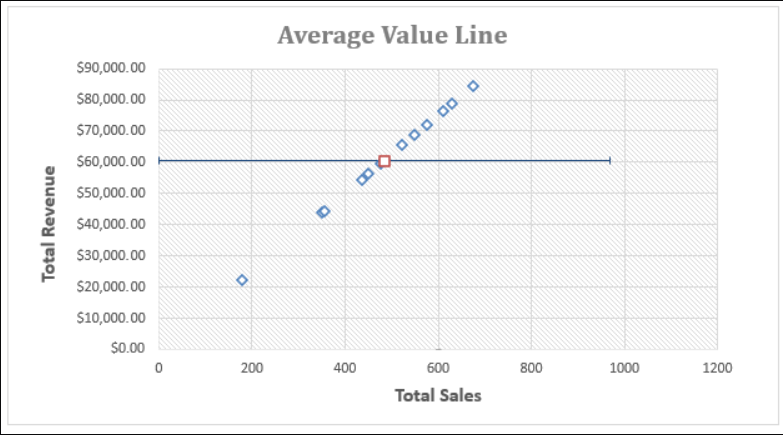

## Linear Regression
`outcome(i) = model + error(i)`

For linear regression, it becomes:

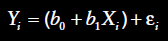

Loss function

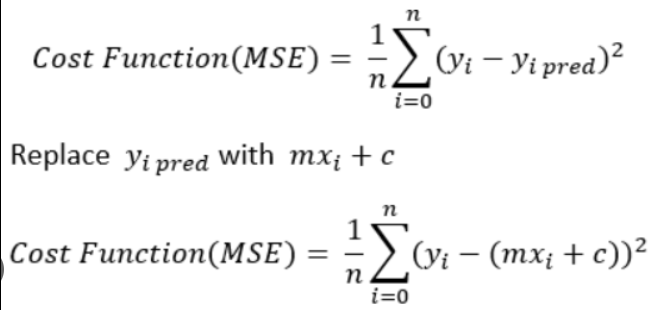

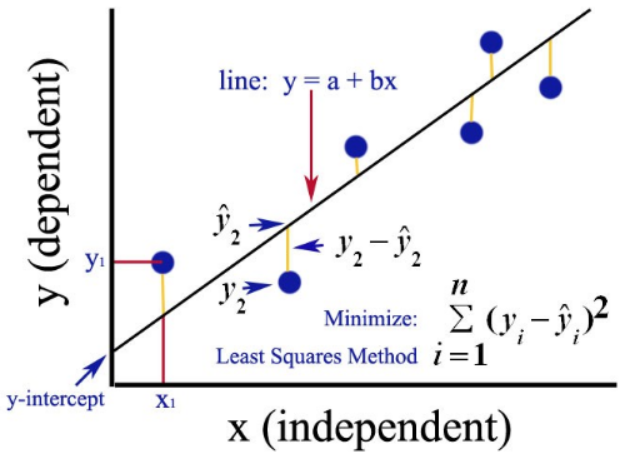

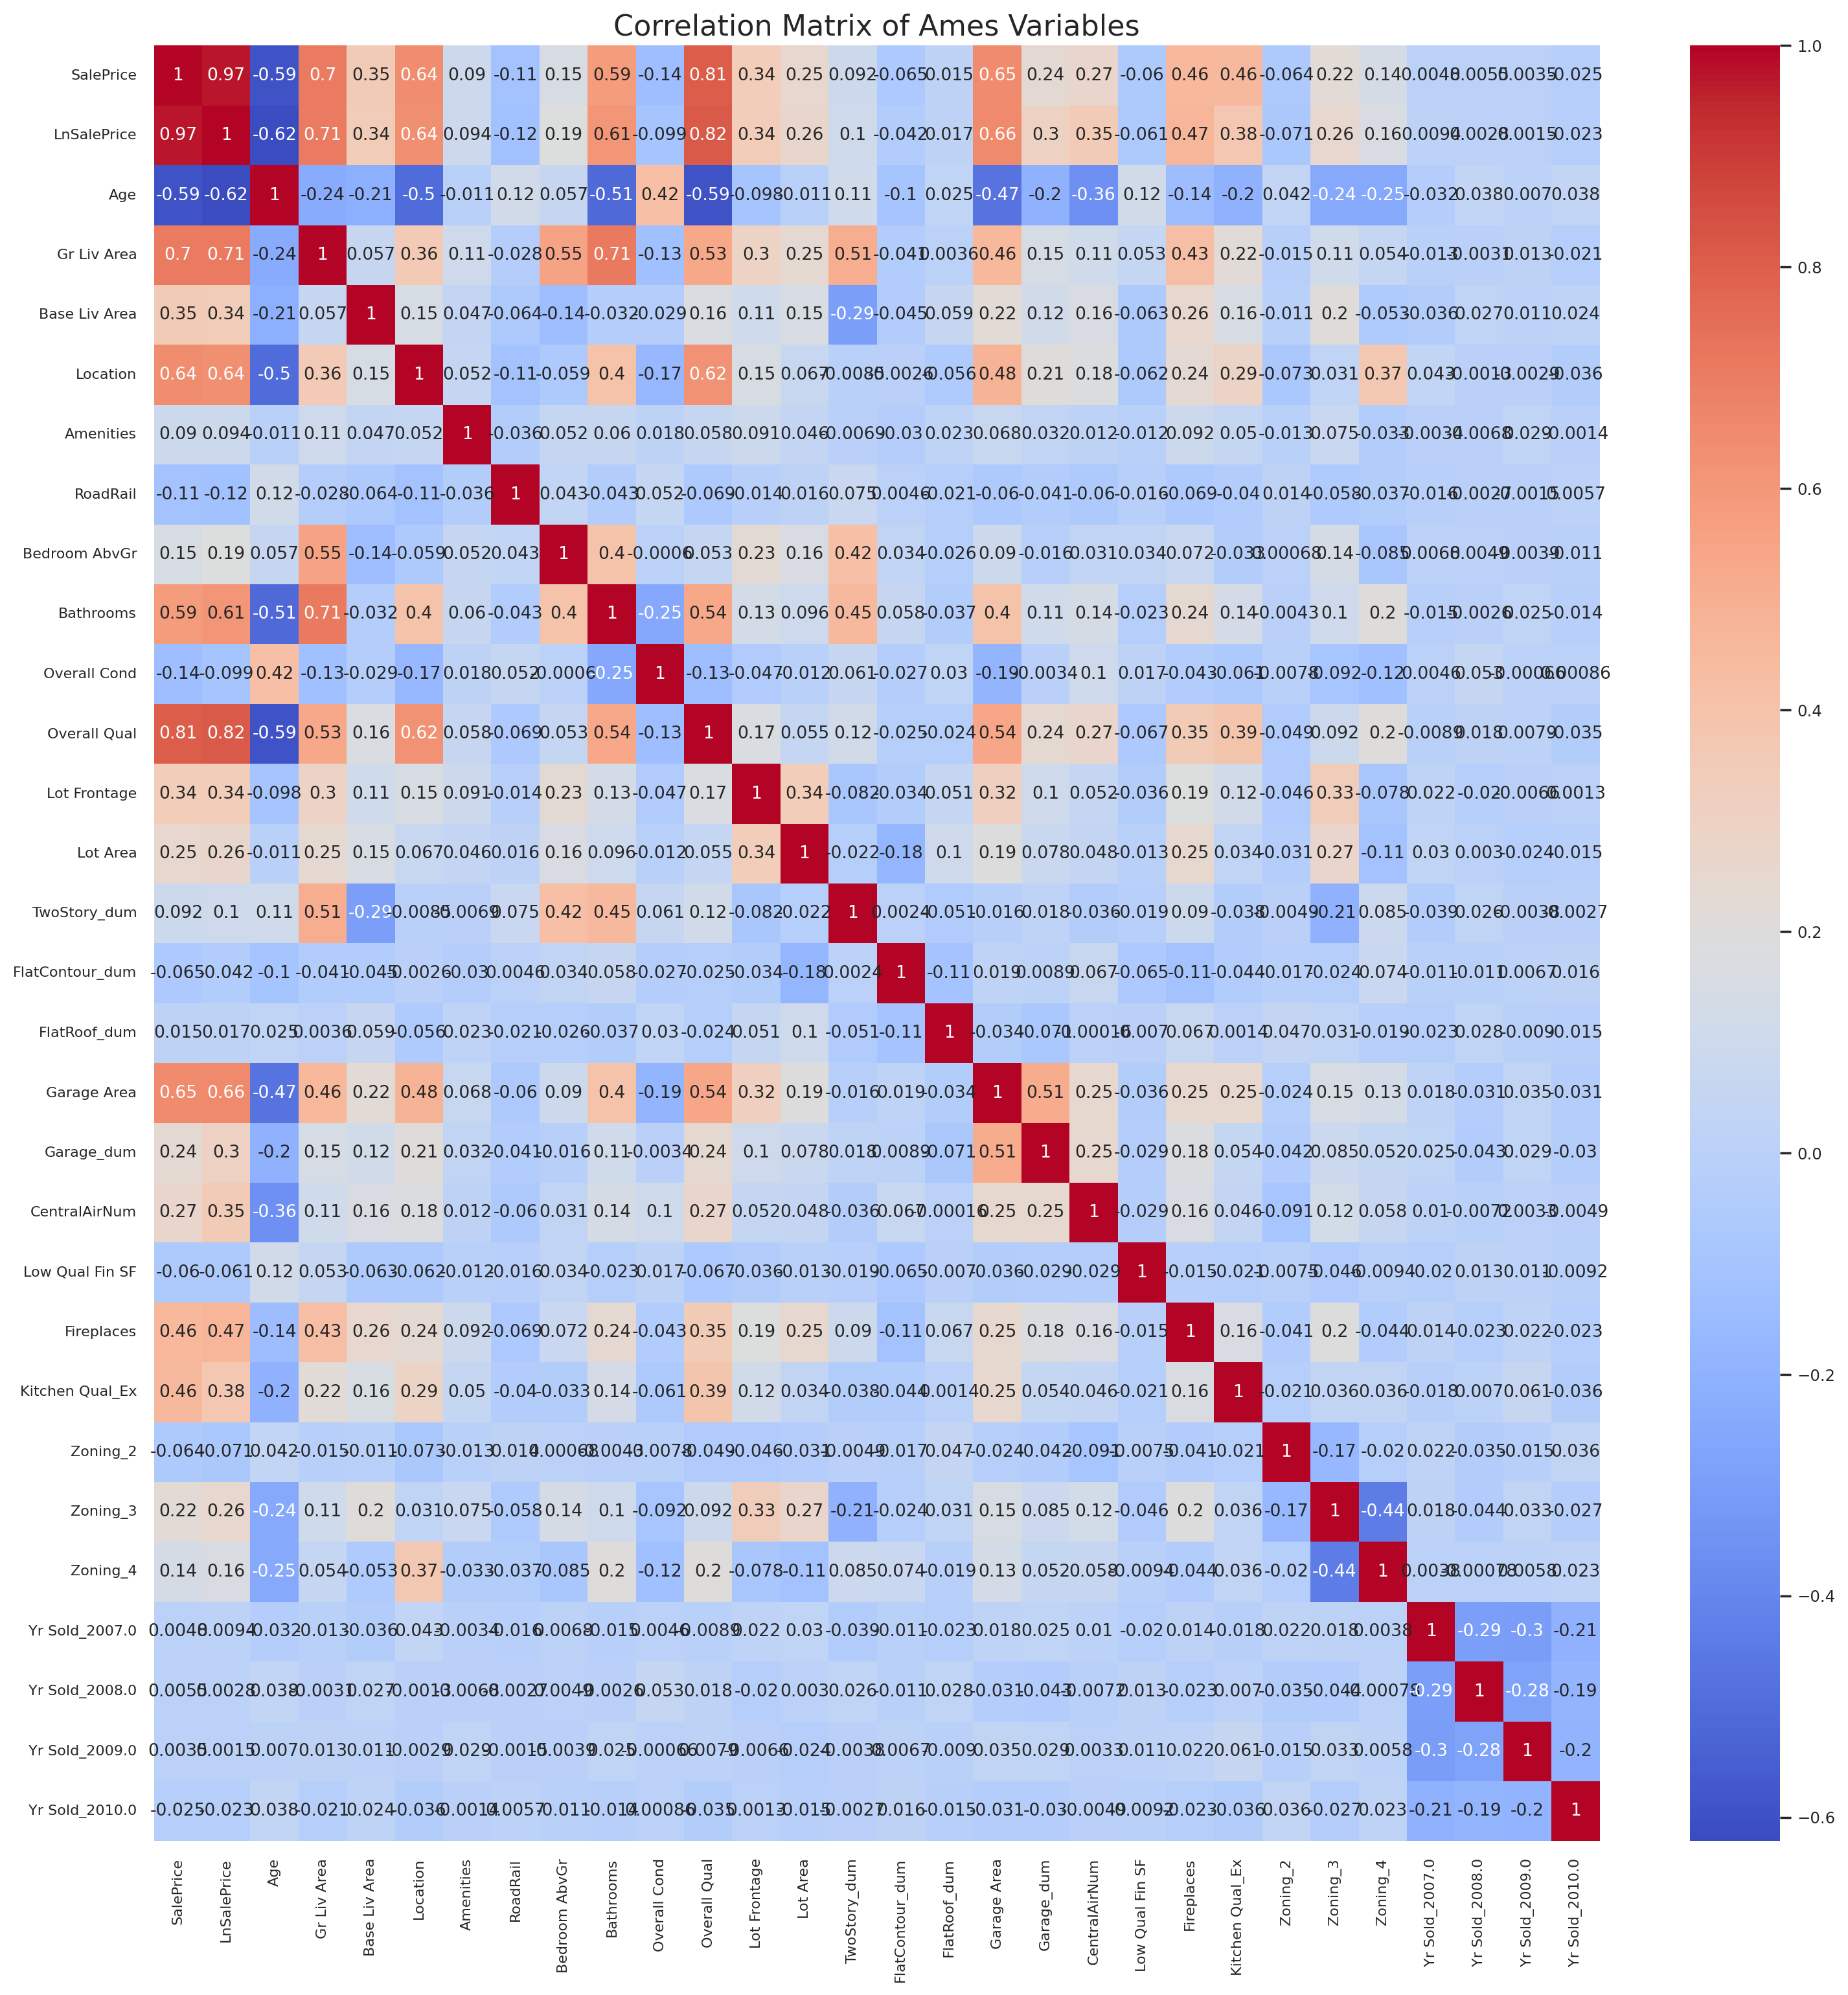

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))

sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Ames Variables", fontsize=16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)
plt.show()

In [ ]:
# Function for scoring test set
def test_scores(model, X, y):
  '''
  model: fitted model
  X: Matrix of explanatory variables (test set)
  y: Dependant variable (test set)
  '''
  print('Test Score (R-squared): ', np.round(model.score(X, y), 4))

# Function for MSE & RMSE scoring
def accuracy_scores(model, X, y):
  '''
  model: fitted model
  X: Matrix of explanatory variables (test set)
  y: Dependant variable (test set)
  '''
  yhat = model.predict(X)
  print('Mean Squared Error: ', np.round(metrics.mean_squared_error(y, yhat), 4))
  print('Root Mean Squared Error: ', np.round((metrics.mean_squared_error(y, yhat))**0.5, 4))

## Regression using LnSalePrice

In [ ]:
y_SP = df['SalePrice']
y_lnSP = df['LnSalePrice']

In [ ]:
X = df.drop(['SalePrice', 'LnSalePrice'], axis=1)
X.shape

(2605, 28)

In [ ]:
# Train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size=0.3, random_state=8)

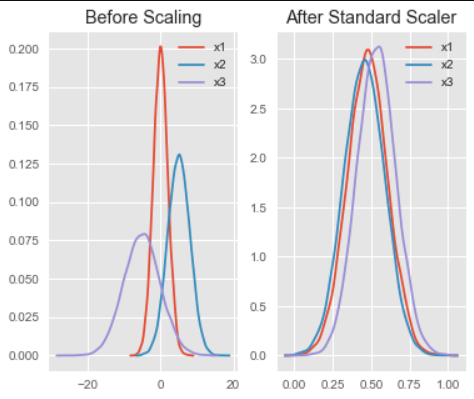

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Fitting ordinary linear regression & getting parameter estimates
ols = LinearRegression()
ols.fit(X_train, y_train)

print("Traning data R-square: ", np.round(ols.score(X_train, y_train), 4))
print("Intercept: ", ols.intercept_)
print("Coefficients: ", ols.coef_)

Traning data R-square:  0.9124
Intercept:  12.026410983714156
Coefficients:  [-0.07861307  0.14175962  0.04427219  0.03321634 -0.00147096 -0.00822658
 -0.00910208  0.00882105  0.0494374   0.10477659  0.01810867  0.01977633
 -0.02281622 -0.00781232  0.006359    0.02573149  0.00297141  0.01338065
 -0.00639768  0.01750395  0.01699235 -0.0061349   0.02053832  0.01208785
  0.00108204  0.0009199  -0.00201372  0.00505283]


[Model Evaluation documentation (Sk-Learn)](https://scikit-learn.org/0.15/modules/model_evaluation.html)

In [ ]:
# OLS test set score
test_scores(ols, X_test, y_test)

Test Score (R-squared):  0.9142


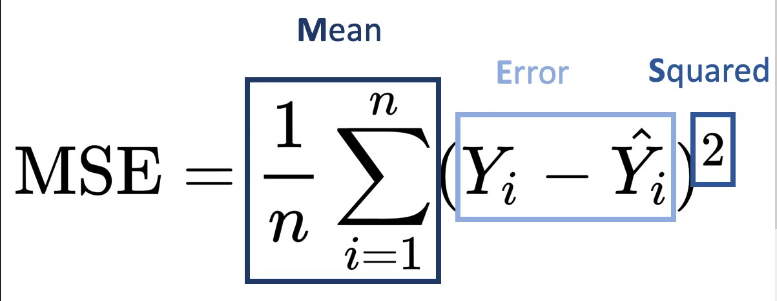

In [ ]:
# OLS MSE & RMSE scores
accuracy_scores(ols, X_test, y_test)

Mean Squared Error:  0.0121
Root Mean Squared Error:  0.1102


## Multi-Collinearity
It is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation **multicollinearity**

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model

## Checking for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vals = [VIF(df, i) for i in range(1, df.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=df.columns [1:])
vif

,vif
LnSalePrice,174.764408
Age,8.919168
Gr Liv Area,78.704168
Base Liv Area,3.238606
Location,13.816609
Amenities,1.049111
RoadRail,1.106809
Bedroom AbvGr,26.646895
Bathrooms,29.872800
Overall Cond,41.795660


## Handling Multi-Collinearity using Ridge and Lasso Regression


1.   Lasso Regression: Uses L1 regularization
> 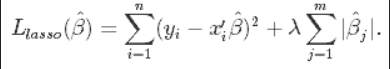


2.   Ridge Regression: Uses L2 regularization
> 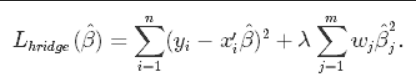

3. ElasticNet: Uses both L1 and L2 regularization

In [ ]:
# Lasso Cross-Validation
lasso_mod = LassoCV(alphas=[0.01, 0.1, 1, 10, 15, 20], cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print("Training Score:", round(lasso_mod.score(X_train, y_train), 4))
print("Test Score:", round(lasso_mod.score(X_test, y_test), 4))

Best Lasso alpha: 0.01
Training Score: 0.9028
Test Score: 0.905


In [ ]:
# Lasso MSE & RMSE scores
accuracy_scores(lasso_mod, X_test, y_test)

Mean Squared Error:  0.0135
Root Mean Squared Error:  0.116


In [ ]:
# Confirmed similar to the above Ridge CV scores
ridge_mod = RidgeCV(alphas=[0.01, 0.1, 1, 10, 15, 20], cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print("Training Score:", round(ridge_mod.score(X_train, y_train), 4))
print("Test Score:", round(ridge_mod.score(X_test, y_test), 4))

Best Ridge alpha: 1.0
Training Score: 0.9124
Test Score: 0.9142


In [ ]:
# Ridge MSE & RMSE scores
accuracy_scores(ridge_mod, X_test, y_test)

Mean Squared Error:  0.0121
Root Mean Squared Error:  0.1102


## Any Questions??
Reach out via E-mail (sayantansinha85@gmail.com)